# Import 

In [434]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error

# Load Data

In [326]:
data_train = pd.read_csv('input_data/train.csv')
data_test = pd.read_csv('input_data/test.csv')

# Exploratory Data Analys

In [327]:
data_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [328]:
print(data_train.info(verbose=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [329]:
data_test[data_test.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition


Missed values in Train and Test datasets

In [330]:
print('Missing values')
for column in data_test.columns:
    missed_val_tr = data_train[column].isna().sum()
    missed_val_test = data_test[column].isna().sum()
    if (missed_val_tr) or (missed_val_test):
        print(f'{column}: \ttrain - {missed_val_tr}, \ttest - {missed_val_test}')

print(f'Total records: \n\ttrain - {data_train.shape[0]}, \n\ttest - {data_test.shape[0]}')

Missing values
MSZoning: 	train - 0, 	test - 4
LotFrontage: 	train - 259, 	test - 227
Alley: 	train - 1369, 	test - 1352
Utilities: 	train - 0, 	test - 2
Exterior1st: 	train - 0, 	test - 1
Exterior2nd: 	train - 0, 	test - 1
MasVnrType: 	train - 872, 	test - 894
MasVnrArea: 	train - 8, 	test - 15
BsmtQual: 	train - 37, 	test - 44
BsmtCond: 	train - 37, 	test - 45
BsmtExposure: 	train - 38, 	test - 44
BsmtFinType1: 	train - 37, 	test - 42
BsmtFinSF1: 	train - 0, 	test - 1
BsmtFinType2: 	train - 38, 	test - 42
BsmtFinSF2: 	train - 0, 	test - 1
BsmtUnfSF: 	train - 0, 	test - 1
TotalBsmtSF: 	train - 0, 	test - 1
Electrical: 	train - 1, 	test - 0
BsmtFullBath: 	train - 0, 	test - 2
BsmtHalfBath: 	train - 0, 	test - 2
KitchenQual: 	train - 0, 	test - 1
Functional: 	train - 0, 	test - 2
FireplaceQu: 	train - 690, 	test - 730
GarageType: 	train - 81, 	test - 76
GarageYrBlt: 	train - 81, 	test - 78
GarageFinish: 	train - 81, 	test - 78
GarageCars: 	train - 0, 	test - 1
GarageArea: 	train - 0, 	t

Since there are categorical features with originaly NA value it is recognized as missed, so categorical missed values with NotApplicable.

In [331]:
replace_col = ['MiscFeature','Fence','PoolQC','GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu','BsmtFinType2','BsmtFinType1','BsmtExposure','BsmtCond', 'BsmtQual','MasVnrType','Alley'] # replace with NotApplicable

data_train[replace_col] = data_train[replace_col].fillna('NotApplicable', axis=1)
data_test[replace_col] = data_test[replace_col].fillna('NotApplicable', axis=1)

Total amount of rows with missed values.

In [332]:
data_train.isna().any(axis=1).sum()

340

Check is there any relationship in gaps between MasVnrType and MasVnrArea. And it is if there are no Masonry, so its area is NaN and replace it with 0.

In [333]:
data_test[data_test.MasVnrArea.isna()][['Id', 'MasVnrType', 'MasVnrArea']]

,Id,MasVnrType,MasVnrArea
231,1692,NotApplicable,NaN
246,1707,NotApplicable,NaN
422,1883,NotApplicable,NaN
532,1993,NotApplicable,NaN
544,2005,NotApplicable,NaN
581,2042,NotApplicable,NaN
851,2312,NotApplicable,NaN
865,2326,NotApplicable,NaN
880,2341,NotApplicable,NaN
889,2350,NotApplicable,NaN


In [334]:
data_train.MasVnrArea.fillna(0, inplace=True)
data_test.MasVnrArea.fillna(0, inplace=True)

Check the missed values after changes.

In [335]:
columns_for_dropna = []
print('Missing values')
for column in data_test.columns:
    missed_val_tr = data_train[column].isna().sum()
    missed_val_test = data_test[column].isna().sum()
    if (missed_val_tr) or (missed_val_test):
        columns_for_dropna.append(column)
        print(f'{column}: \ttrain - {missed_val_tr}, \ttest - {missed_val_test}')

print(f'Total records: \n\ttrain - {data_train.shape[0]}, \n\ttest - {data_test.shape[0]}')
print('All columns wit NA: ', columns_for_dropna)

Missing values
MSZoning: 	train - 0, 	test - 4
LotFrontage: 	train - 259, 	test - 227
Utilities: 	train - 0, 	test - 2
Exterior1st: 	train - 0, 	test - 1
Exterior2nd: 	train - 0, 	test - 1
BsmtFinSF1: 	train - 0, 	test - 1
BsmtFinSF2: 	train - 0, 	test - 1
BsmtUnfSF: 	train - 0, 	test - 1
TotalBsmtSF: 	train - 0, 	test - 1
Electrical: 	train - 1, 	test - 0
BsmtFullBath: 	train - 0, 	test - 2
BsmtHalfBath: 	train - 0, 	test - 2
KitchenQual: 	train - 0, 	test - 1
Functional: 	train - 0, 	test - 2
GarageYrBlt: 	train - 81, 	test - 78
GarageCars: 	train - 0, 	test - 1
GarageArea: 	train - 0, 	test - 1
SaleType: 	train - 0, 	test - 1
Total records: 
	train - 1460, 
	test - 1459
All columns wit NA:  ['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SaleType']


Select features with missed values up to 5 and drop the rows.

In [336]:
columns_for_dropna.remove('LotFrontage')
columns_for_dropna.remove('GarageYrBlt')
print(columns_for_dropna)

['MSZoning', 'Utilities', 'Exterior1st', 'Exterior2nd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'GarageCars', 'GarageArea', 'SaleType']


In [337]:
data_train.dropna(inplace=True, subset=columns_for_dropna)
data_test.dropna(inplace=True, subset=columns_for_dropna)

Separate features into groups based on data types.

In [338]:
data_train["MSSubClass"]= data_train["MSSubClass"].apply(str) # Converting MSSubClass to string as it is a categorical variable
data_test["MSSubClass"]= data_test["MSSubClass"].apply(str)


discrete = ['OverallQual','OverallCond','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold', 'YrSold', 'GarageYrBlt']
ordinal = ['MSSubClass', 'Utilities', 'Street','LotShape', 'LandSlope', 'BsmtExposure', 'Functional', 'CentralAir', 'Electrical','GarageFinish','PavedDrive','Fence','ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',  'KitchenQual', 'HeatingQC', 'FireplaceQu', 'GarageQual', 'GarageCond', 'PoolQC', 'Alley','BsmtFinType1','BsmtFinType2']

# Separating continous and discrete variables 
continous = data_train.select_dtypes(include=['float64', 'int64']).columns.values.tolist()
for var in discrete:
    if var in continous:
        continous.remove(var)

# Separating nominal and ordinal variables
nominal = data_train.select_dtypes(include='object').columns.values.tolist()
for var in ordinal:
    if var in nominal:
        nominal.remove(var)

<b>Categorical Features:</b>\
How many times each unique value appears in each feature. For instance, if a categorical feature like "Utilities" or "Condition2" is mostly filled with one value, it's not giving us much useful information. We will drop these feaures in the preprocessing process.

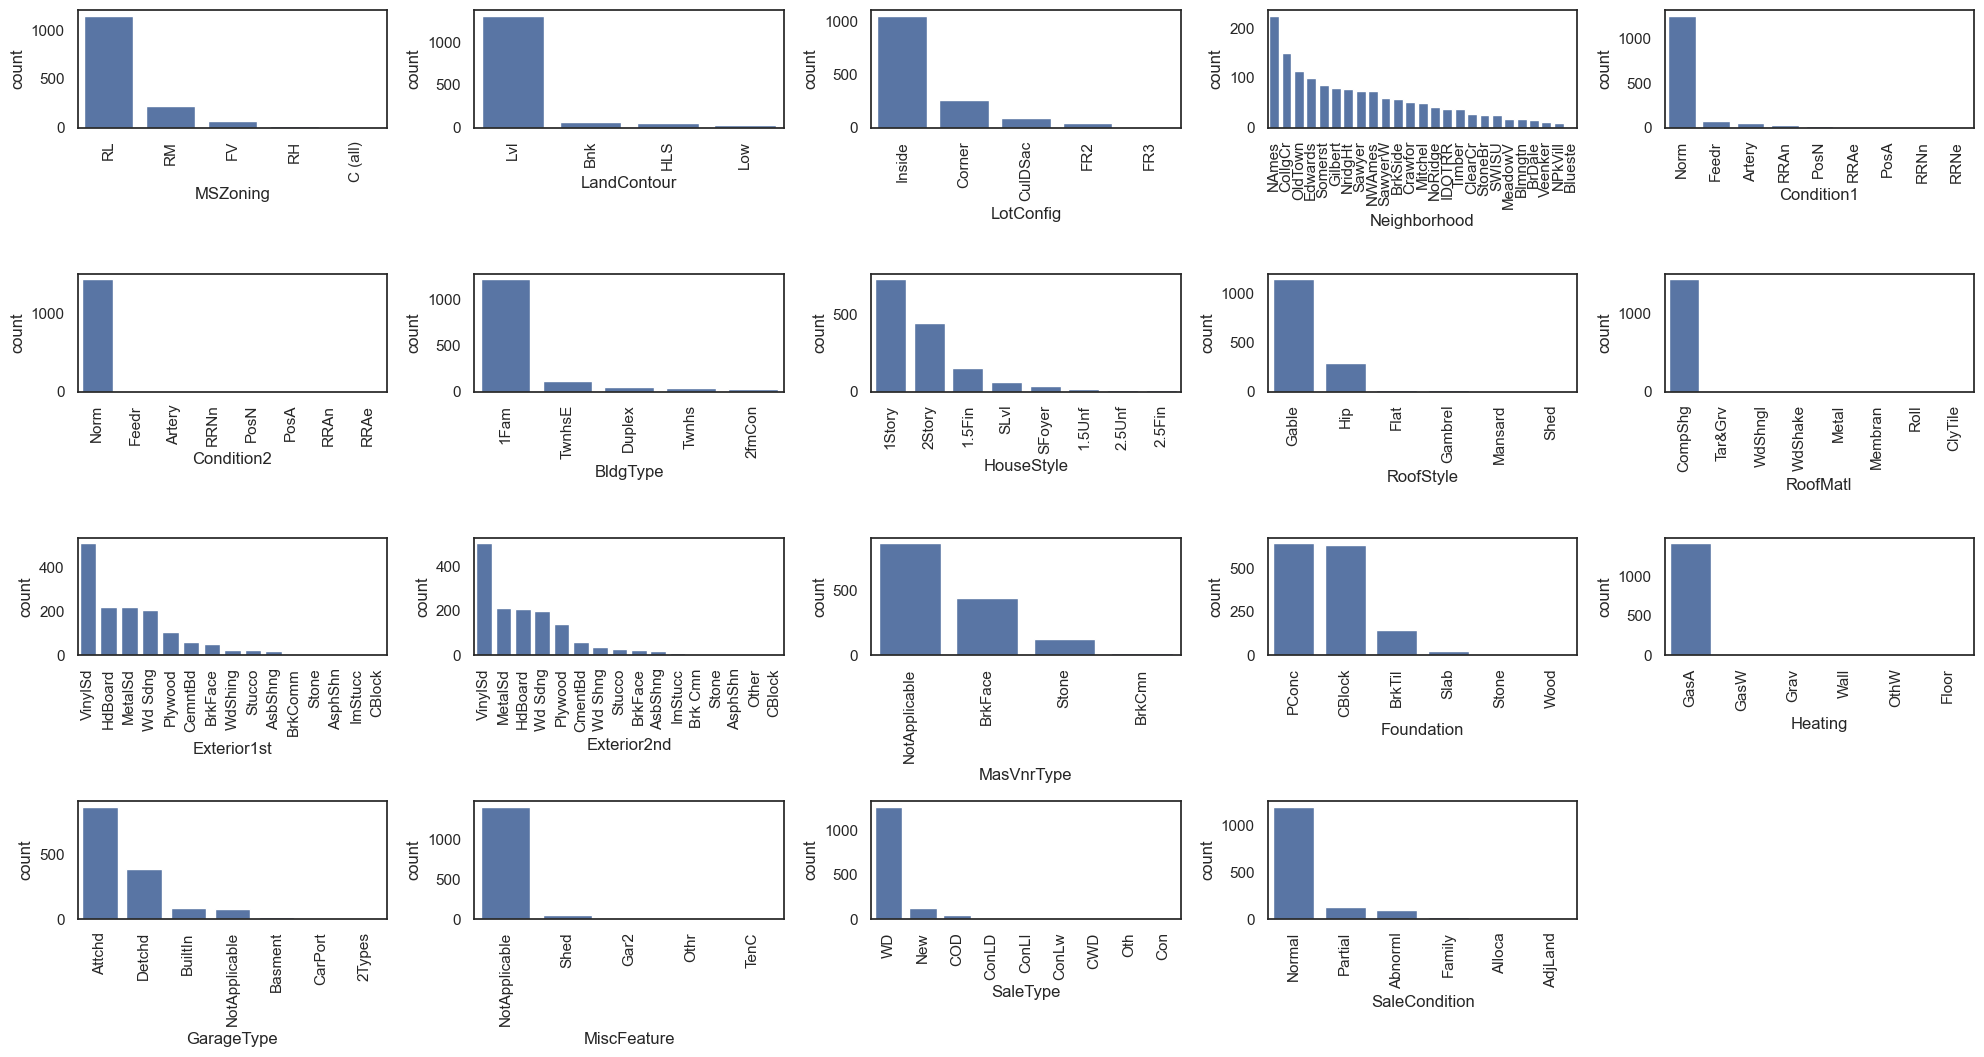

In [339]:
fig = plt.figure(figsize=(20, 20))
for index, var in enumerate(nominal):
    plt.subplot(8,5,index+1)
    sns.countplot(x=var, data=data_train, order=data_train[var].value_counts().index)
    plt.xticks(rotation=90)
plt.tight_layout()

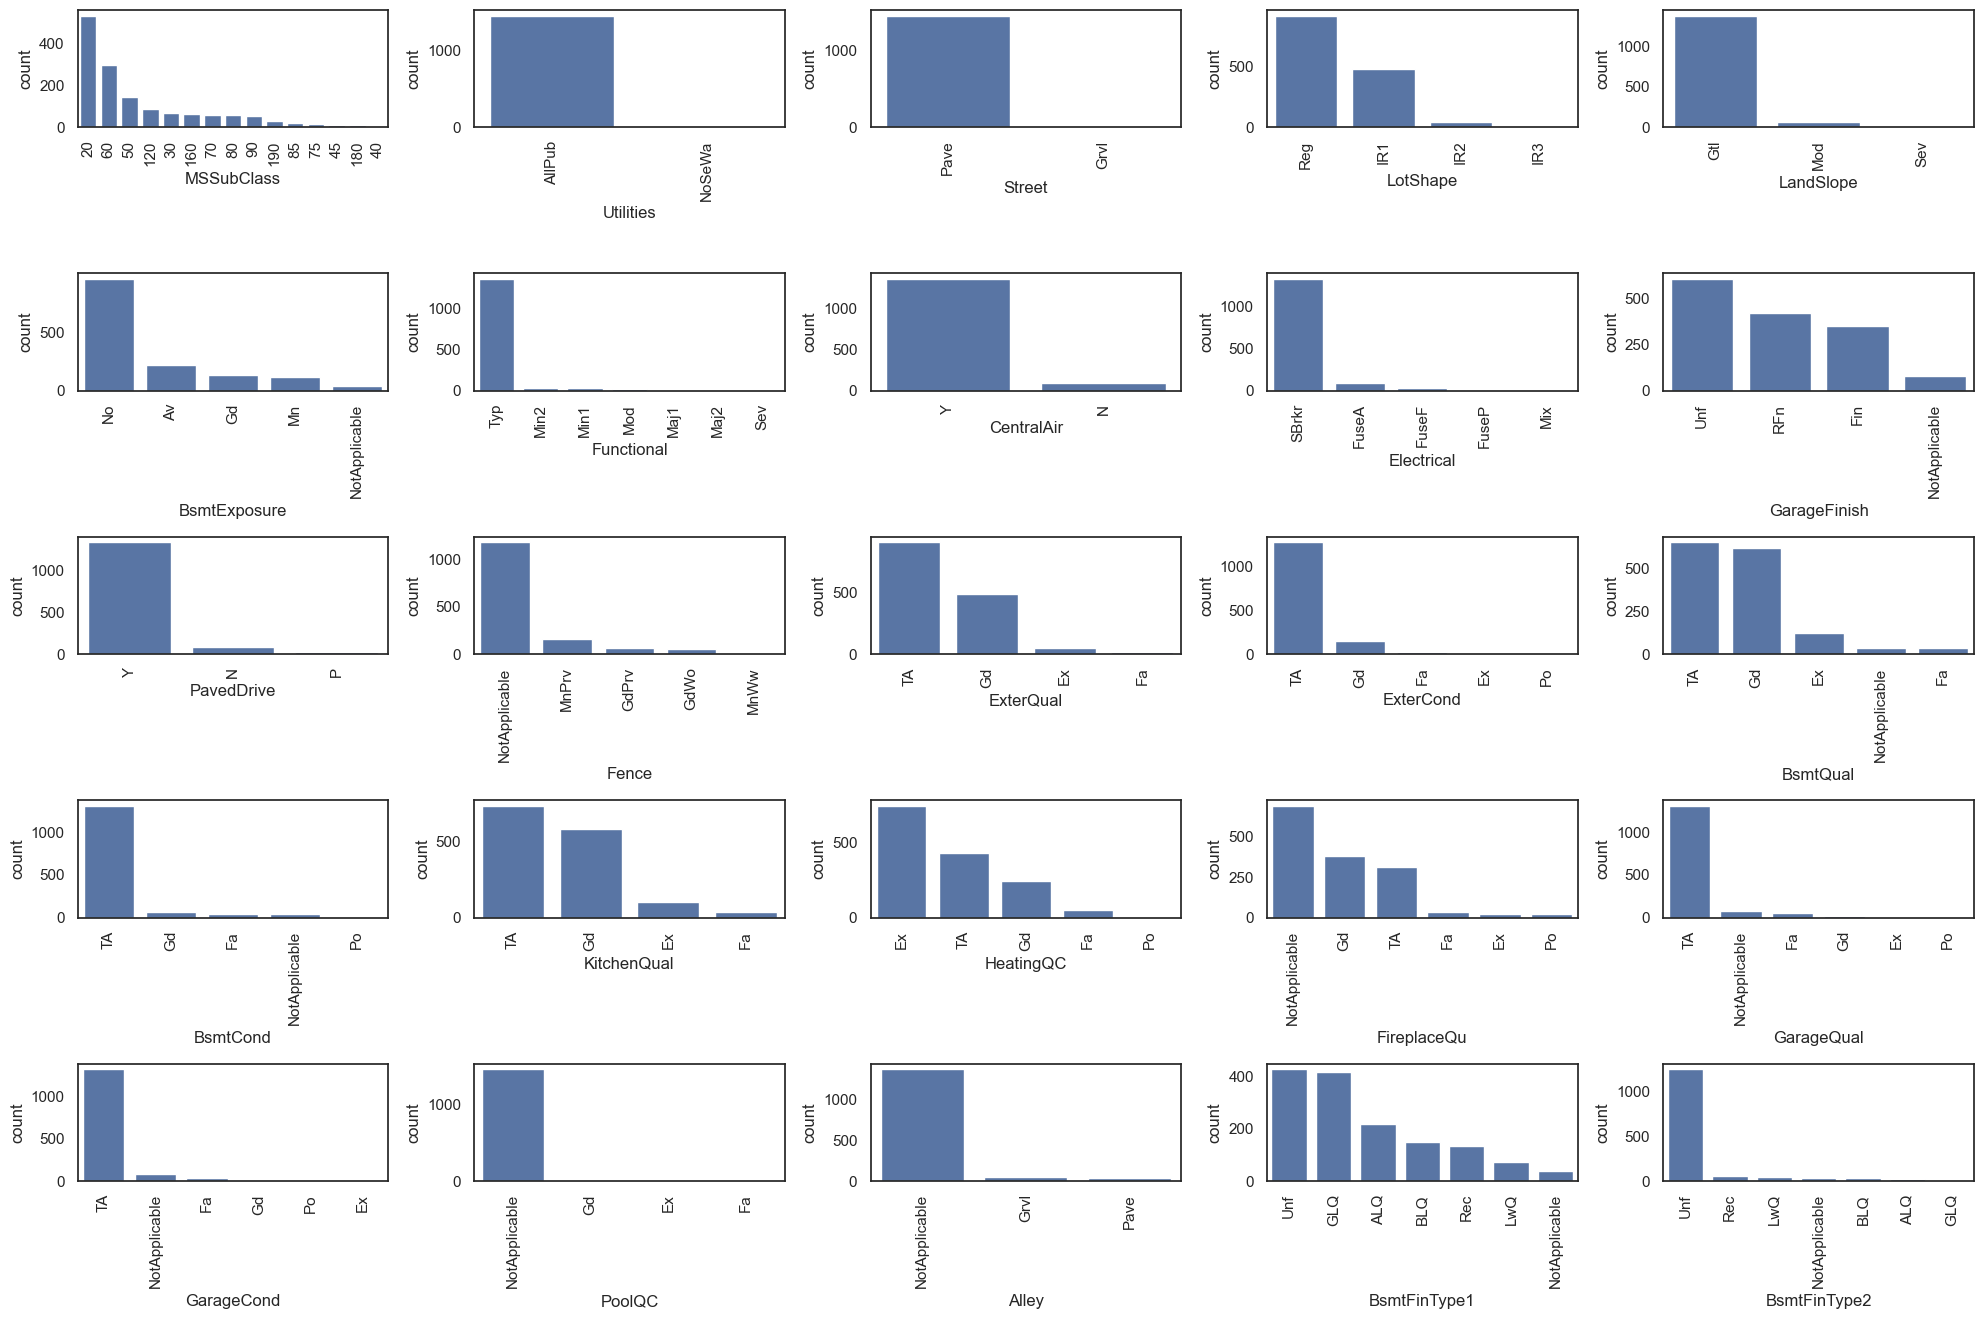

In [340]:
fig = plt.figure(figsize=(20,20))
for index, var in enumerate(ordinal):
    plt.subplot(8, 5, index+1)
    sns.countplot(x=var, data=data_train, order=data_train[var].value_counts().index)
    plt.xticks(rotation=90)
plt.tight_layout()

<b>Numeric Features with correlation more than 0.5 with Target Feature:</b>\
Visualising relationships between numerical features. While they don't offer precise quantitative evidence on the strength of these relationships like a correlation matrix does, scatterplots excel at visualizing diverse relationships that might go beyond simple linearity, such as quadratic or exponential patterns.

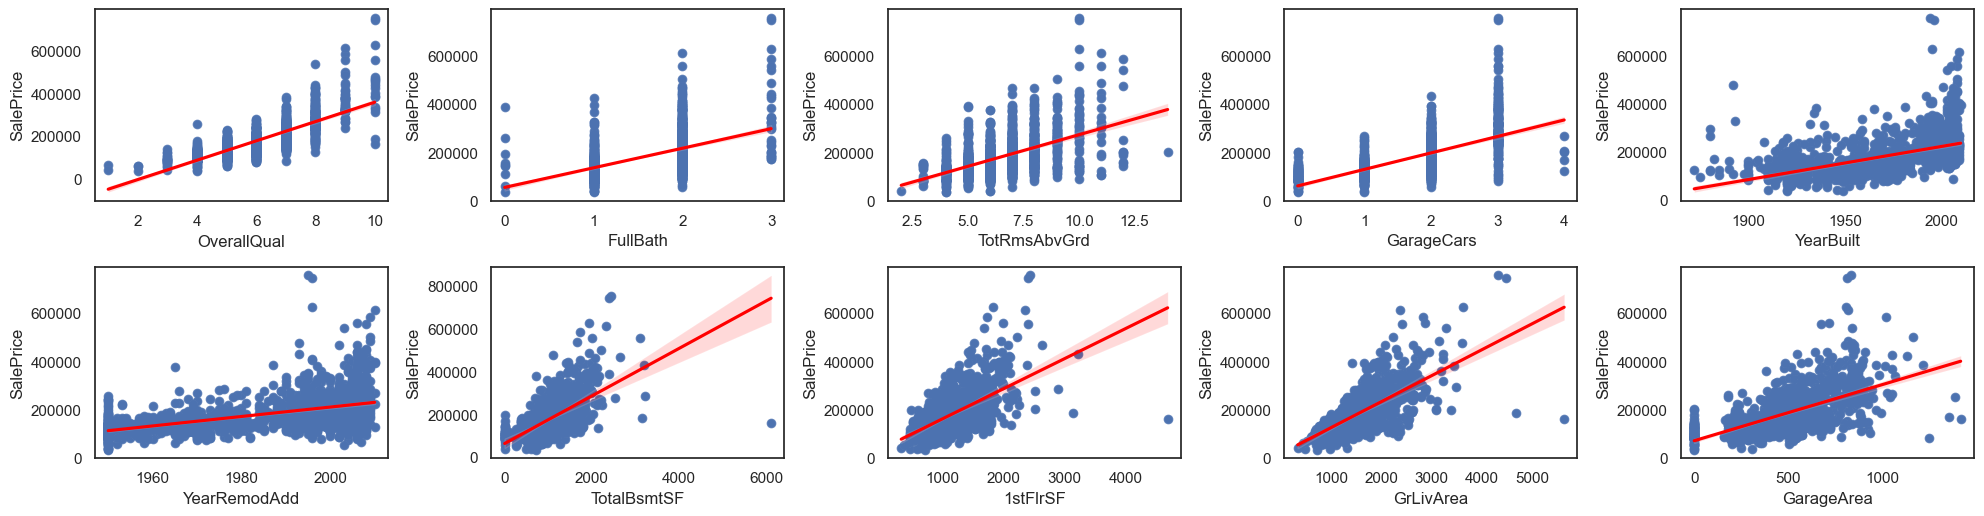

In [341]:
tmp = data_train[discrete+continous].corr().loc['SalePrice']
i = 0
fig = plt.figure(figsize=(20, 10))

for feat, val in zip(tmp.index, tmp.values):
    if 0.5 < val < 1:
        plt.subplot(4,5,i+1)
        sns.scatterplot(x=feat, y='SalePrice', data=data_train)
        sns.regplot(x=feat, y='SalePrice', data=data_train, line_kws={'color':'red'})
        i+=1
fig.tight_layout()

Show is the feature contain the only value.

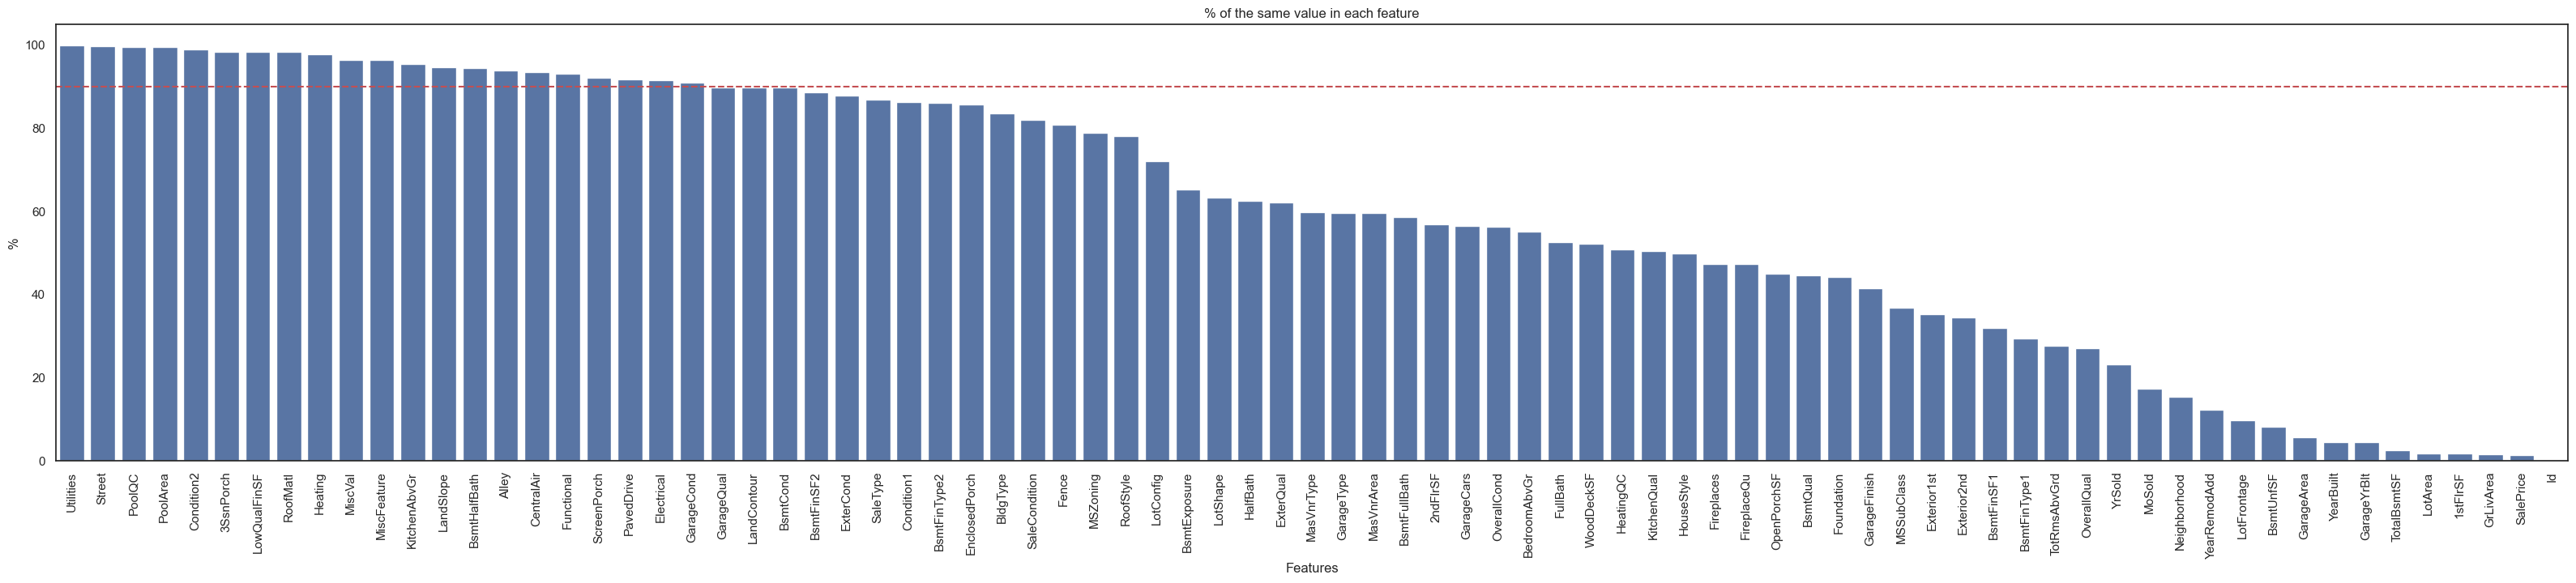

In [342]:
plt.figure(figsize=(40,7))
plt.title('% of the same value in each feature')

most_common_counts = data_train.apply(lambda x: x.value_counts().max())
missing_count = pd.DataFrame(100*most_common_counts/len(data_train), columns=['%']).sort_values(by=['%'], ascending=False).reset_index()
missing_count.columns = ['Features', '%']

sns.barplot(data=missing_count, x='Features', y='%')
plt.xticks(rotation=90)
plt.axhline(y=90, color='r', linestyle='--')

Delete features with 95% of one value.

In [343]:
def remove_col_on_threshold(dataframe, threshold):
    cols = []
    for col in dataframe.columns:
        if dataframe[col].value_counts().iloc[0]/dataframe.__len__() > threshold:
            cols.append(col)
    return cols

In [344]:
single_val_columns = remove_col_on_threshold(data_train, 0.95)
data_train.drop(single_val_columns, axis=1, inplace=True)
data_test.drop(single_val_columns, axis=1, inplace=True)

<b>Features with Multicollinearity</b>
* GarageYrBlt and YearBuilt
* TotRmsAbvGrd and GrLivArea
* 1stFlrSF and TotalBsmtSF
* GarageArea and GarageCars
\
\
Multicollinearity occurs when two or more independent variables are highly correlated. This can lead to a loss of precision in our regression coefficients, impacting our ability to pinpoint the most important features for our model.

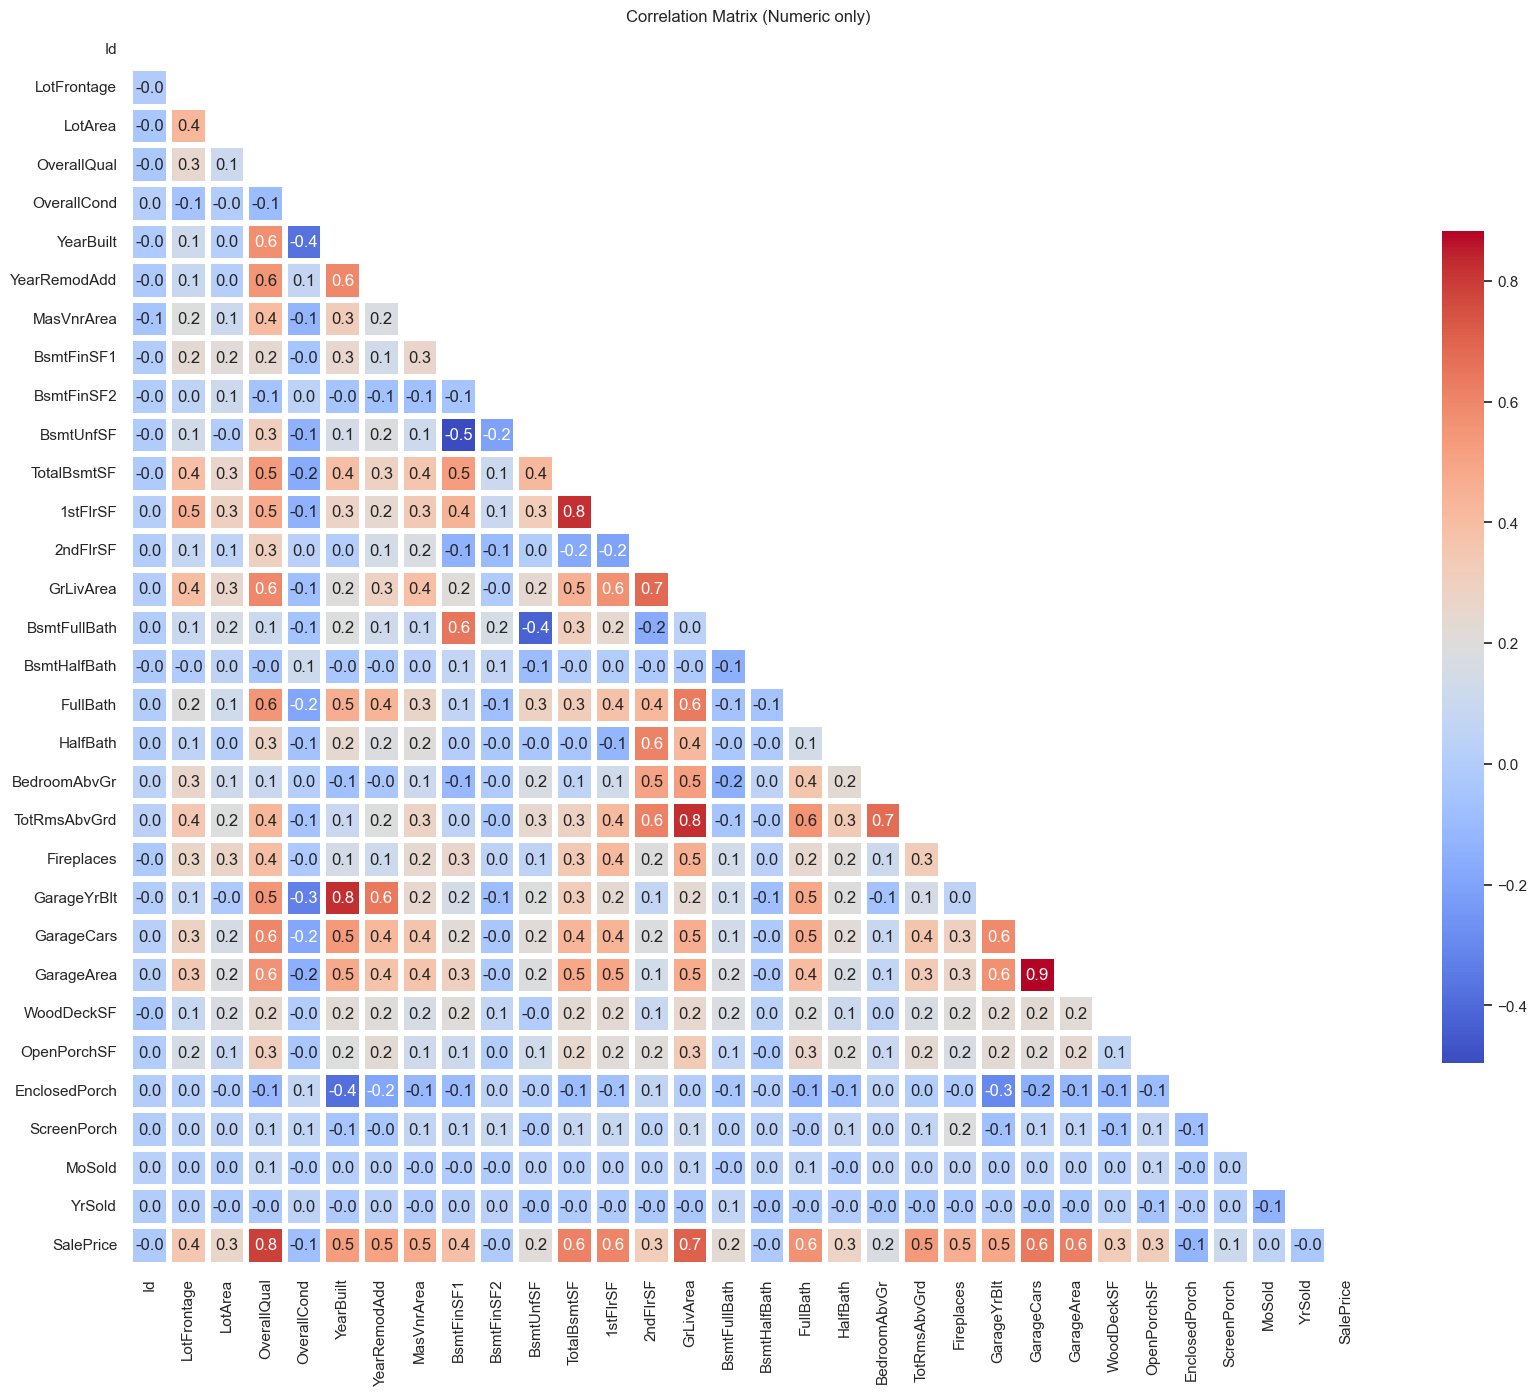

In [345]:
correlation_train_data = data_train.select_dtypes(['int64', 'float64']).corr()
# create mask to show values only under main diagonal
mask = np.triu(np.ones_like(correlation_train_data, dtype=bool))

plt.figure(figsize=(17,17))
sns.set_theme(style='white')
sns.heatmap(correlation_train_data, 
            cmap='coolwarm', 
            annot=True, 
            fmt='.1f', 
            linewidths=3, 
            square=True,
            cbar_kws={'shrink': .5},
            mask=mask)

plt.title('Correlation Matrix (Numeric only)')
plt.tight_layout()

To mitigate the issue of multicollinearity, we'll proceed to remove these highly correlated features during the preprocessing steps. Removing values with high correlation to each other and low correlation to saleprice.

In [346]:
data_train.drop(['GarageYrBlt', 'TotRmsAbvGrd', '1stFlrSF', 'GarageCars'], axis=1, inplace=True)

<b>Features not correlated to the target:</b>
* BsmtFinSF1
* BsmtHalfBath
* MoSold
* YrSold


From the plot analysis, it's evident that MoSold (Month Sold) and YrSold (Year Sold) don't exhibit any discernible linear relationship with the target variable SalePrice. As a result, we will remove these features during the preprocessing stage.

Instead we will create a post-2008 feature that will indicate whether the property was sold before or after the global financial crisis started, as it may have an effect on the prices in some areas, which is not visible on the chart below.

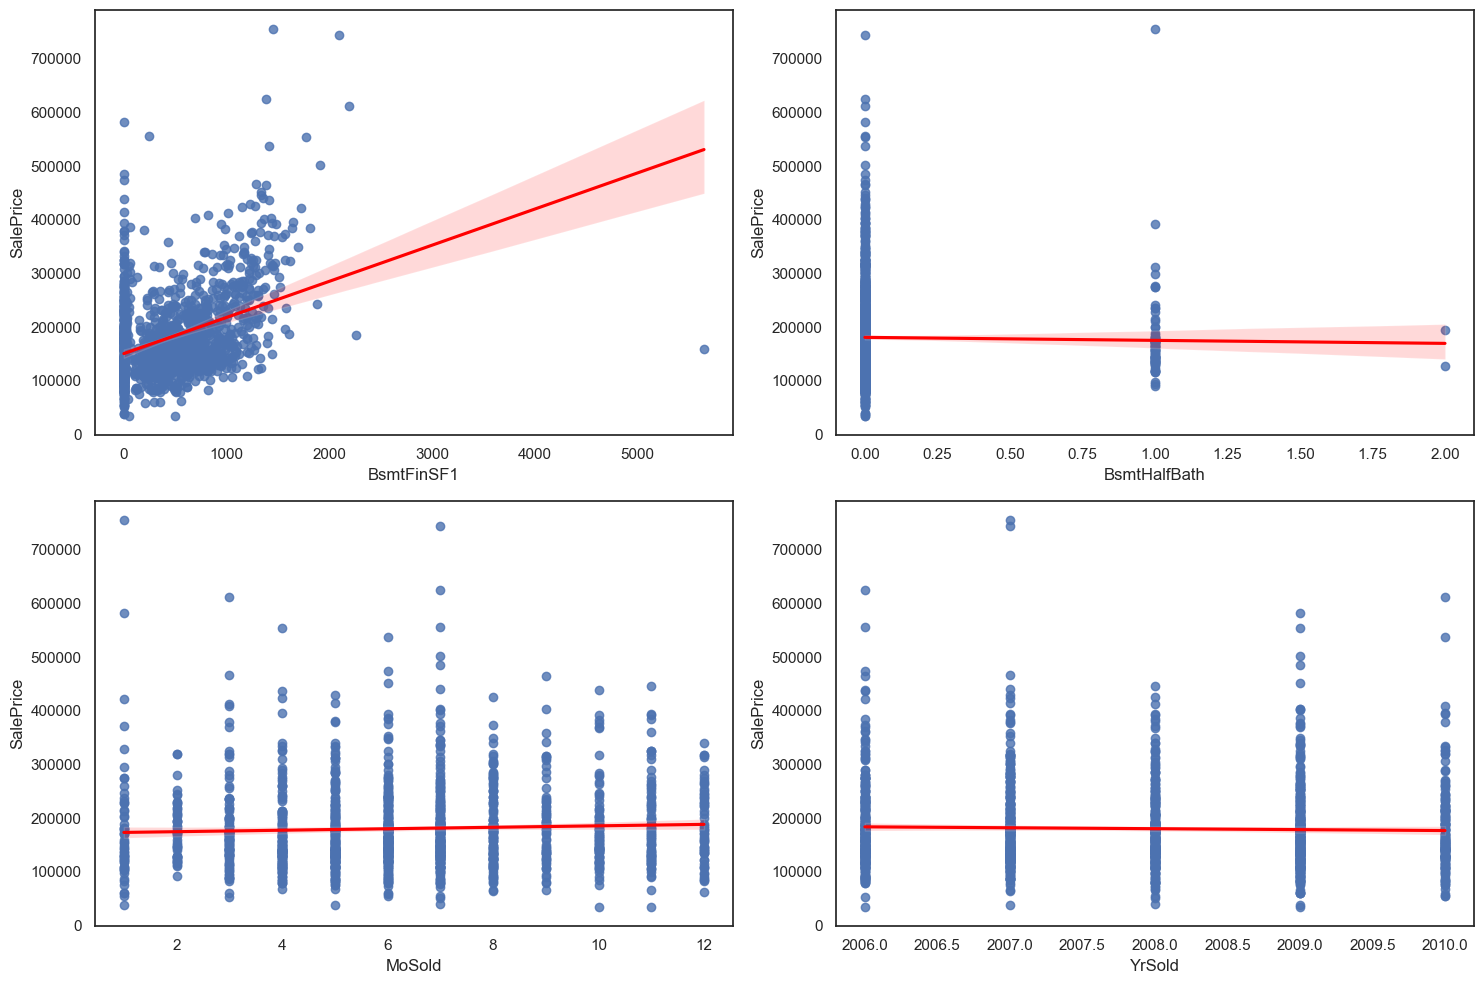

In [347]:
fig, axes = plt.subplots(2, 2, figsize=(15,10))
sns.regplot(data=data_train, x='BsmtFinSF1', y='SalePrice', ax=axes[0,0], line_kws={'color': 'red'})
sns.regplot(data=data_train, x='BsmtHalfBath', y='SalePrice', ax=axes[0,1], line_kws={'color': 'red'})
sns.regplot(data=data_train, x='MoSold', y='SalePrice', ax=axes[1,0], line_kws={'color': 'red'})
sns.regplot(data=data_train, x='YrSold', y='SalePrice', ax=axes[1,1], line_kws={'color': 'red'})
plt.tight_layout()

In [348]:
data_train['post-2008'] = data_train.YrSold >= 2008
data_train['post-2008'] = data_train['post-2008'].astype('int')
data_train.drop(['BsmtHalfBath', 'MoSold', 'YrSold'], axis=1, inplace=True)

<b>Outliers</b>

Removing outliers is crucial to prevent our model's performance from being influenced by extreme values. 
Identified from the boxplot analysis, the following features exhibit extreme outliers:
\
* LotFrontage
* LotArea
* BsmtFinSF1
* TotalBsmtSF
* GrLivArea


To maintain model robustness, we will proceed to remove these outliers based on a specified threshold value during the preprocessing stage.

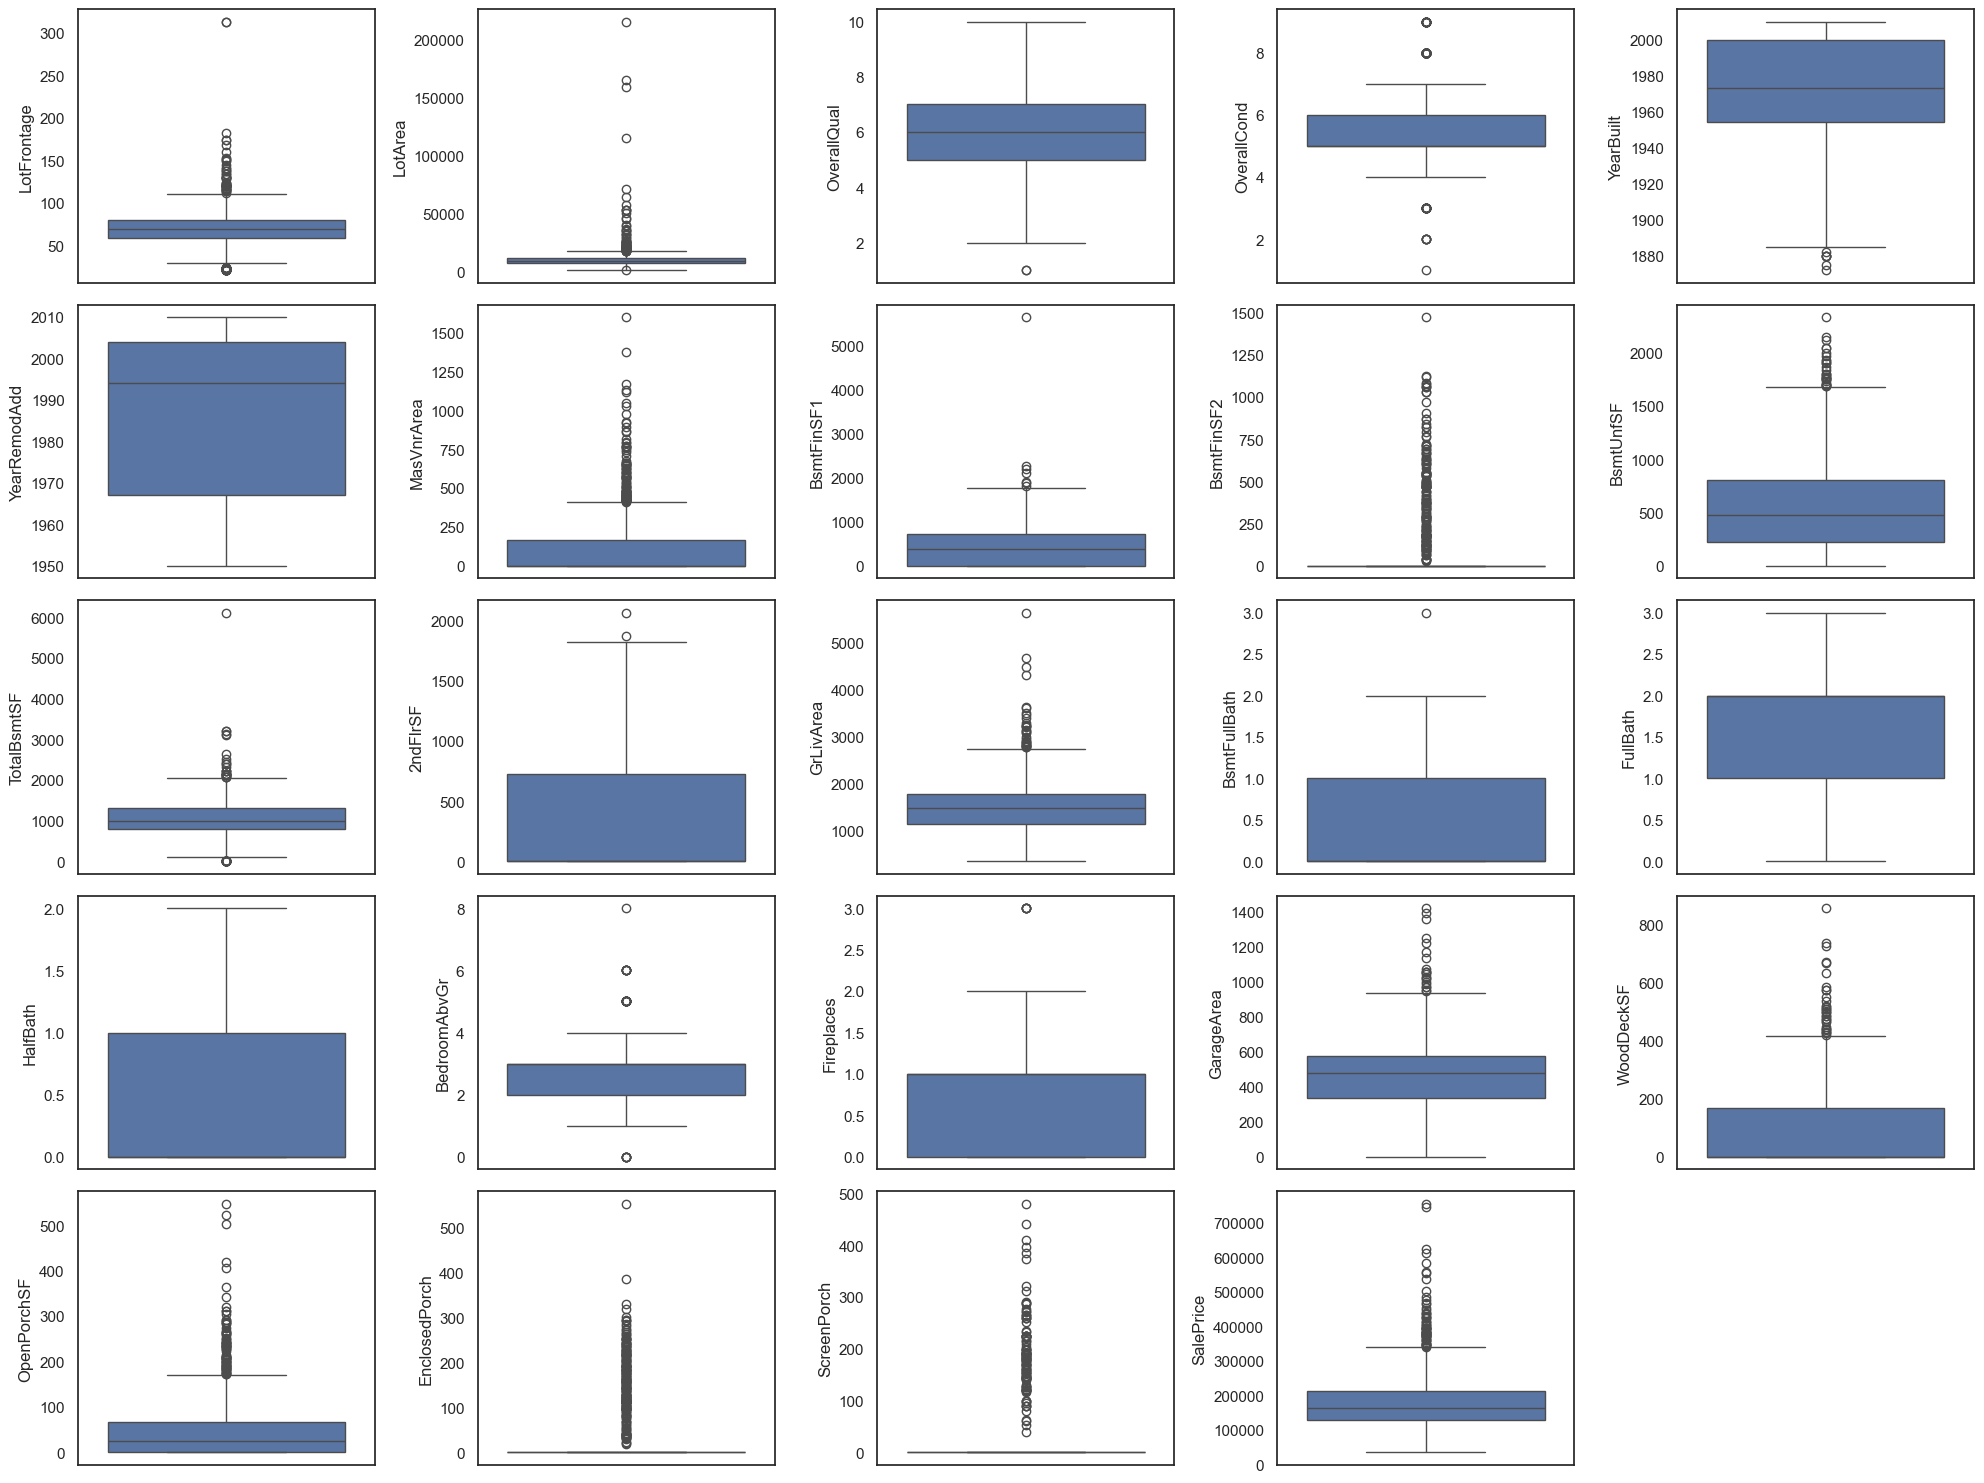

In [349]:
fig = plt.figure(figsize=(20,15))

for index, feat_name in enumerate(data_train.select_dtypes(['int64', 'float64']).columns.to_list()[1:]):
    plt.subplot(5,5,index+1)
    sns.boxplot(y=feat_name, data=data_train)
fig.tight_layout()

Replace Outliers with cutting extreme values.

In [350]:
data_train.LotFrontage.clip(upper=200, inplace=True)
data_train.LotArea.clip(upper=100000, inplace=True)
data_train.MasVnrArea.clip(upper=1250, inplace=True)
data_train.BsmtFinSF1.clip(upper=3000, inplace=True)
data_train.BsmtFinSF2.clip(upper=1250, inplace=True)
data_train.TotalBsmtSF.clip(upper=4000, inplace=True)
data_train.GrLivArea.clip(upper=4000, inplace=True)

Missing Values in LotFrontage.

In [351]:
for i in range(data_train.shape[1]):
    if data_train.isna().sum().values[i]:
        print(f"{data_train.isna().sum().index[i]} \t {data_train.isna().sum().values[i]}")


LotFrontage 	 259


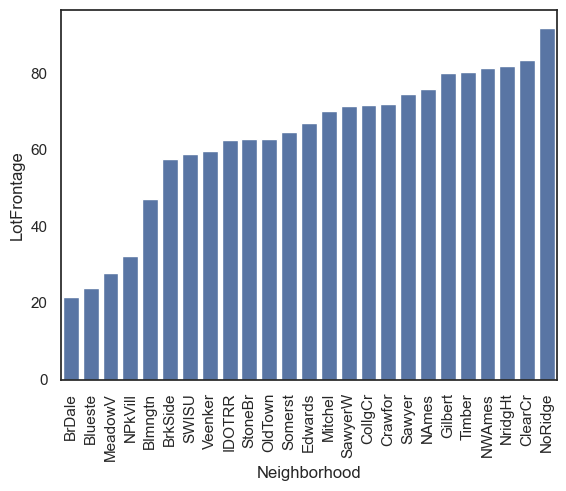

In [352]:
frontage = data_train.groupby('Neighborhood')['LotFrontage'].mean().reset_index(name='LotFrontage')
sns.barplot(data=frontage, x='Neighborhood', y='LotFrontage', order=frontage.sort_values(by='LotFrontage')['Neighborhood'])
plt.xticks(rotation=90)
plt.show()

Fill missed values in LotFrontage with mean values.

In [353]:
data_train['LotFrontage'] = data_train.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.mean()))

Mapping variables.

In [354]:
columns = data_train.select_dtypes('object').columns.tolist()
values = []
for col in columns:
    values.append(sorted(data_train[col].unique()))

feature_df = pd.DataFrame({'Feature': columns, 'Unique values': values})

In [355]:
feature_df.sort_values(by='Unique values').head(25)

,Feature,Unique values
10,HouseStyle,"[1.5Fin, 1.5Unf, 1Story, 2.5Fin, 2.5Unf, 2Stor..."
0,MSSubClass,"[120, 160, 180, 190, 20, 30, 40, 45, 50, 60, 7..."
9,BldgType,"[1Fam, 2fmCon, Duplex, Twnhs, TwnhsE]"
29,GarageType,"[2Types, Attchd, Basment, BuiltIn, CarPort, De..."
22,BsmtFinType2,"[ALQ, BLQ, GLQ, LwQ, NotApplicable, Rec, Unf]"
21,BsmtFinType1,"[ALQ, BLQ, GLQ, LwQ, NotApplicable, Rec, Unf]"
36,SaleCondition,"[Abnorml, AdjLand, Alloca, Family, Normal, Par..."
8,Condition1,"[Artery, Feedr, Norm, PosA, PosN, RRAe, RRAn, ..."
13,Exterior2nd,"[AsbShng, AsphShn, Brk Cmn, BrkFace, CBlock, C..."
12,Exterior1st,"[AsbShng, AsphShn, BrkComm, BrkFace, CBlock, C..."


Create mapping dictionaries.

In [356]:
cond_map = {'Ex':5, 'Fa':2, 'Gd':4, 'NotApplicable':0, 'Po':1, 'TA':3}
BsmtExposure_map = {'Av':3, 'Gd':4, 'Mn':2, 'No':1, 'NotApplicable':0}
BsmtFinType_map = {'ALQ':5, 'BLQ':4, 'GLQ':6, 'LwQ':2, 'NotApplicable':0, 'Rec':3, 'Unf':1}

In [357]:
for col in ['GarageCond', 'GarageQual', 'FireplaceQu', 'BsmtQual', 'HeatingQC', 'ExterCond', 'KitchenQual']:
    data_train[col] = data_train[col].map(cond_map)

data_train['BsmtExposure'] = data_train['BsmtExposure'].map(BsmtExposure_map)
data_train['BsmtFinType1'] = data_train['BsmtFinType1'].map(BsmtFinType_map)
data_train['BsmtFinType2'] = data_train['BsmtFinType2'].map(BsmtFinType_map)

SalePrice distribution.

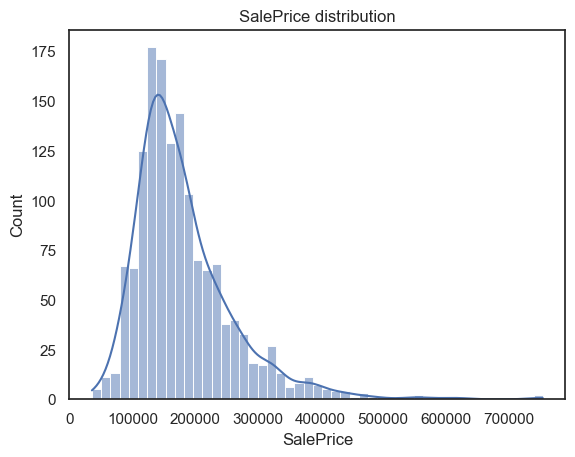

In [358]:
sns.histplot(data=data_train, x='SalePrice', kde=True)
plt.title('SalePrice distribution')
plt.show()

# Feature Engineering

<b>New Features:</b>

* TotalLot: Sum of LotFrontage and LotArea, indicating the total land area.
* TotalSF: Sum of TotalBsmtSF and GrLivArea, representing the total surface area of the house.
* TotalBath: Sum of FullBath and HalfBath, indicating the total number of bathrooms.
* TotalPorch: Sum of OpenPorchSF, EnclosedPorch, and ScreenPorch, representing the total porch area.
* TotalBsmtFin: Sum of BsmtFinSF1 and BsmtFinSF2, indicating the total finished basement area.

In [359]:
data_train['TotalLot'] = data_train['LotFrontage'] + data_train['LotArea']
data_train['TotalSF'] = data_train['TotalBsmtSF'] + data_train['GrLivArea']
data_train['TotalBath'] = data_train['FullBath'] + data_train['HalfBath']
data_train['TotalPorch'] = data_train['OpenPorchSF'] + data_train['EnclosedPorch'] + data_train['ScreenPorch']
data_train['TotalBsmtFin'] = data_train['BsmtFinSF1'] + data_train['BsmtFinSF2']

In [360]:
feature_df[feature_df['Unique values'].apply(len) < 5]

,Feature,Unique values
2,Alley,"[Grvl, NotApplicable, Pave]"
3,LotShape,"[IR1, IR2, IR3, Reg]"
4,LandContour,"[Bnk, HLS, Low, Lvl]"
6,LandSlope,"[Gtl, Mod, Sev]"
14,MasVnrType,"[BrkCmn, BrkFace, NotApplicable, Stone]"
15,ExterQual,"[Ex, Fa, Gd, TA]"
24,CentralAir,"[N, Y]"
26,KitchenQual,"[Ex, Fa, Gd, TA]"
30,GarageFinish,"[Fin, NotApplicable, RFn, Unf]"
33,PavedDrive,"[N, P, Y]"


In [361]:
for col in ['MasVnrArea', 'TotalBsmtSF', '2ndFlrSF', 'Fireplaces', 'WoodDeckSF']:
    data_train[col+'_bin'] = data_train[col].apply(lambda x: 1 if x > 0 else 0)

# Scaling

Define columns to scale - all except Id

In [362]:
columns_to_scale = data_train.select_dtypes(np.number).columns.tolist()
columns_to_scale.remove('Id')
columns_to_scale.remove('SalePrice')

In [363]:
def scaler(train_data, test_data, scaling_method):
    if scaling_method == 'robust': 
        transformer = RobustScaler()    # scale using IQR, robust to outliers
    elif scaling_method == 'std':     
        transformer = StandardScaler()  # scale to Standard distribution, sensitive to outliers
    else:                         
        return ValueError('Incorrect method was chosen!')
    
    transformer.fit(train_data[columns_to_scale])
    train_data[columns_to_scale] = transformer.transform(train_data[columns_to_scale])
    test_data[columns_to_scale] = transformer.transform(test_data[columns_to_scale])
    return train_data, test_data

In [364]:
data_train_scaled, _ = scaler(data_train, data_train, 'robust')

# Encoding features

Using the <b>get_dummies()</b> method, we transform categorical variables into numerical columns suitable for input into our machine learning algorithm. This conversion ensures that the model can effectively learn from and interpret the categorical information.

In [365]:
data_train_enc = pd.get_dummies(data_train_scaled, dtype=np.int8)

# Modeling

Time to explore various ensemble methods in this notebook for predicting Housing prices. Also include hyperparameter tuning here.

In [366]:
x_train, x_val, y_train, y_val = train_test_split(data_train_enc.drop('SalePrice', axis=1), data_train_enc['SalePrice'], test_size=0.3, shuffle=True)

In [367]:
def training_model(model, x_train, y_train, x_val, y_val):
    model.fit(x_train, y_train)
    predict = model.predict(x_val)
    score = cross_val_score(model, x_val, y_val, cv=3, scoring='neg_root_mean_squared_error').mean()
    return predict, score

In [368]:
all_score = dict()
all_predict = dict()

Linear Model(s)

In [369]:
linear = LinearRegression()
all_predict['linear'], all_score['linear'] = training_model(linear, x_train, y_train, x_val, y_val)

In [370]:
logistic = LogisticRegression(max_iter=500)
all_predict['logistic'], all_score['logistic']  = training_model(logistic, x_train, y_train, x_val, y_val)

d:\Learning_py\kaggle\House_Prices_Advanced_Regression_Techniques\house_pricing_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\Learning_py\kaggle\House_Prices_Advanced_Regression_Techniques\house_pricing_venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
d:\Learning_py\kaggle\House_Prices_Advanced_Regression_Techniques\house_pricing_venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs fail

Tree Model

In [433]:
rf_tree = RandomForestRegressor(n_estimators=1000)
all_predict['rf_tree'], all_score['rf_tree'] = training_model(rf_tree, x_train, y_train, x_val, y_val)

Neighbor Model

In [372]:
knn = KNeighborsRegressor()
all_predict['knn'], all_score['knn'] = training_model(knn, x_train, y_train, x_val, y_val)

Gradient Booster Model

In [435]:
gb_tree = GradientBoostingRegressor()
all_predict['gb_tree'], all_score['gb_tree'] = training_model(gb_tree, x_train, y_train, x_val, y_val)

Results and Comparison

In [436]:
df_scores = (pd.DataFrame(data=all_score, index=[0]).T.reset_index()).rename(columns={'index':'Model', 0:'Score'})
df_predicts = pd.DataFrame(data=all_predict, index=np.arange(x_val.shape[0]))

Text(0.5, 1.0, 'Models RMSE (smaller-better)')

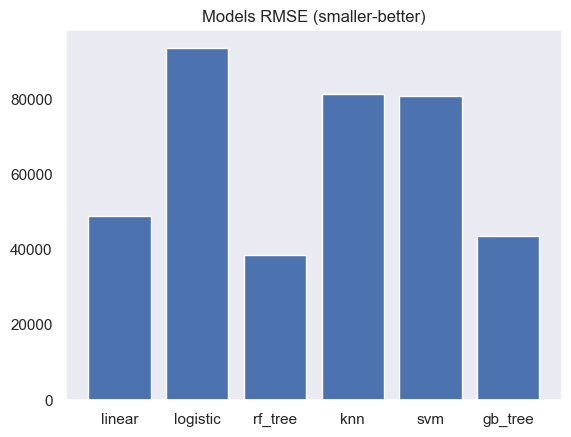

In [437]:
plt.bar(height=-df_scores['Score'], x=df_scores['Model'])
plt.title('Models RMSE (smaller-better)')

([], [])

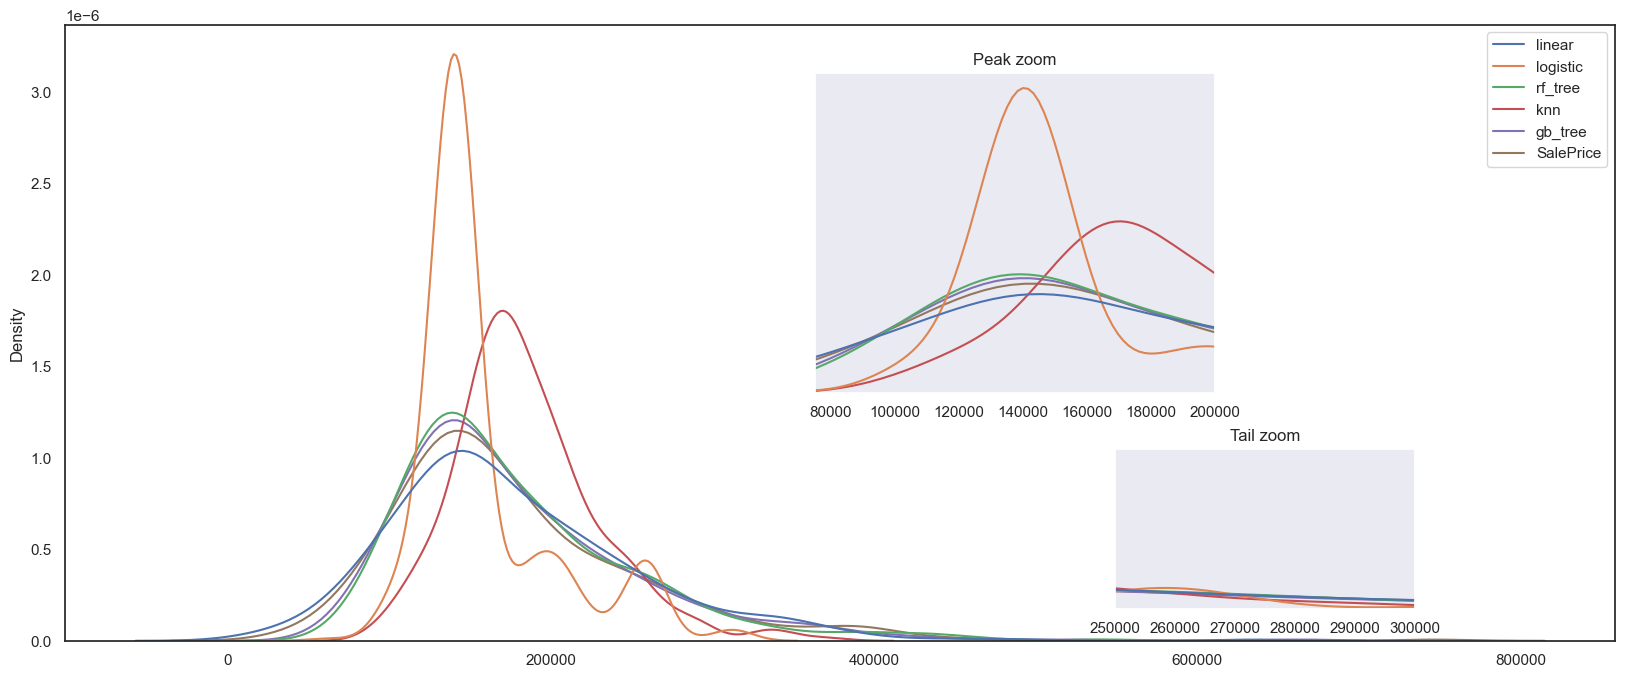

In [438]:
sns.set_theme(style='white')
fig, ax = plt.subplots(figsize=(20,8))
sns.kdeplot([df_predicts.linear, df_predicts.logistic, df_predicts.rf_tree, df_predicts.knn, df_predicts.gb_tree, y_val], ax=ax)

sns.set_theme(style='dark')
ax2 = plt.axes([0.5, 0.42, 0.2, 0.4]) # loc: x, y, width, heigth
sns.kdeplot([df_predicts.linear, df_predicts.logistic, df_predicts.rf_tree, df_predicts.knn, df_predicts.gb_tree, y_val], ax=ax2, legend=False)
ax2.set_xlim([75000,200000])
plt.ylabel(None)
plt.yticks([])
ax2.set_title('Peak zoom')

ax3 = plt.axes([0.65, 0.15, 0.15, 0.2]) # loc: x, y, width, heigth
sns.kdeplot([df_predicts.linear, df_predicts.logistic, df_predicts.rf_tree, df_predicts.knn, df_predicts.gb_tree, y_val], ax=ax3, legend=False)
ax3.set_xlim([250000,300000])
ax3.set_title('Tail zoom')
plt.ylabel(None)
plt.yticks([])

Feature Importance of top 3 models

In [451]:
feature_imp_df = pd.DataFrame(dict(zip(gb_tree.feature_names_in_,gb_tree.feature_importances_)), index=[0]).T.reset_index()
feature_imp_df = feature_imp_df.rename(columns={0: 'Grad Boost Importance'})

In [454]:
feature_imp_df.sort_values('Grad Boost Importance', ascending=False)

,index,Grad Boost Importance
3,OverallQual,0.396941
36,TotalSF,0.367524
5,YearBuilt,0.035645
19,GrLivArea,0.028855
18,2ndFlrSF,0.018076
...,...,...
122,BldgType_TwnhsE,0.000000
124,HouseStyle_1.5Unf,0.000000
126,HouseStyle_2.5Fin,0.000000
127,HouseStyle_2.5Unf,0.000000


<Axes: >

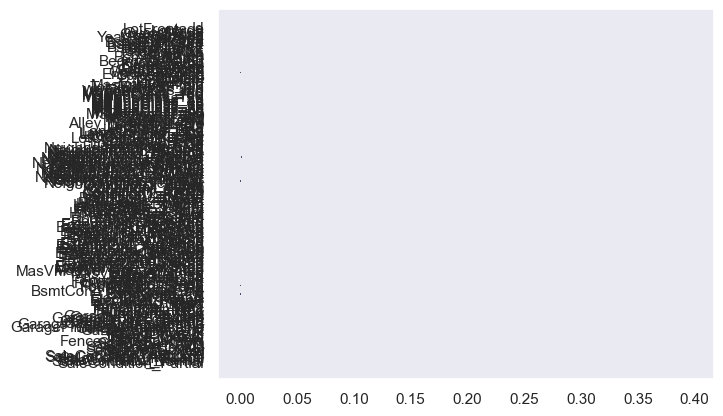

In [441]:
sns.histplot(x=gb_tree.feature_importances_, y=gb_tree.feature_names_in_)

Submission the best